In [1]:
import npp
import math
import numpy as np

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


we start by initializing the constants and calculate the decay constant from the half-lives

In [6]:
NA=1000
NB=0
NC=0

lambdaA=math.log(2)/14.1
lambdaB=math.log(2)/32.2

The decay equation is

$\frac{dN}{dt}=-\lambda N$

So we can write the change of the number of nuclei $N$ in the intinitesimal time $dt$ as 

$dN=-\lambda N dt$

We can build a numerical solution to this equation by taking a very small time step $\Delta t$ instead of the infinitesimal $dt$ and update the number of nuclei at each step by 

$\Delta N=-\lambda N \Delta t$

we will take $N_{steps}=100000$ time steps in this simulation so that each time interval $\Delta t$ is given

$\Delta t=\frac{t_{max}-t_0}{N_{steps}}$

In [7]:
T0,Tmax=0,100
Nsteps=100000
deltat=(Tmax-T0)/float(Nsteps)
ts=np.linspace(T0,Tmax,Nsteps)

Here is the function that implement the step for the number of Nuclei of type A, B and C. Only the radioactive decay of the A nuclei is implemented, implement the missing ones!

In [10]:
def step(NA,NB,NC,deltat):
    #### modify this to give the right time evolution  ####
    newNA=NA-deltat*lambdaA*NA
    newNB=NB
    newNC=NC
    #######################################################
    return newNA,newNB,newNC

This is the sumulation looping over all the time steps and recording the number of nuclei. 

In [11]:
NAs=[]
NBs=[]
NCs=[]

tmax=0
NBmax=0

for t in ts:
    NA,NB,NC=step(NA,NB,NC,deltat)
    NAs.append(NA)
    NBs.append(NB)
    NCs.append(NC)
    # here we keep track of the maximum number of B nuclei so far
    if NB>NBmax:
        tmax=t
        NBmax=NB

<IPython.core.display.Javascript object>


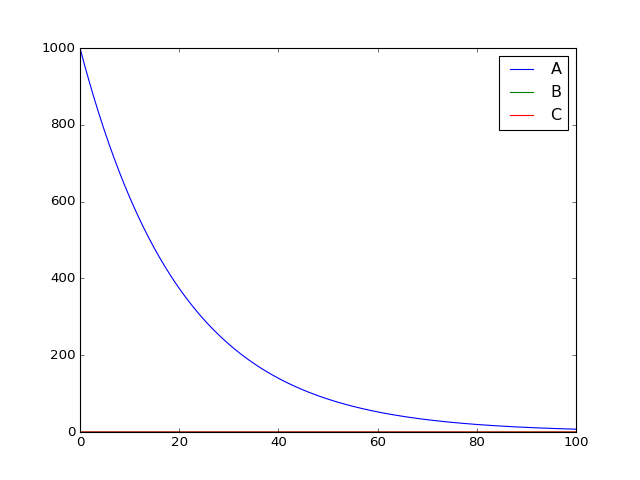

In [17]:
pylab.plot(ts,NAs,label='A')
pylab.plot(ts,NBs,label='B')
pylab.plot(ts,NCs,label='C')
pylab.legend()

We can print the time at which the number of B nuclei is highest.

In [16]:
print ("Maximum number of B atoms is attained at time {0}: {1}".format(tmax,NBmax))

Maximum number of B atoms is attained at time 0: 0
